# German Credit Scores

### Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [3]:
german = pd.read_csv('german.csv', sep = ';')

### Perform Basic Maneuvers

In [4]:
german.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [5]:
german.shape

(1000, 21)

In [6]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [7]:
german.isnull().sum()

Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64

###### That's a very clean dataset... moving on...

### Prepare the Data

In [8]:
x = german.drop('Creditability', axis = 1)
y = pd.DataFrame(german['Creditability'])

### Split into Training and Testing

In [16]:
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(x, y, train_size = 0.8, random_state = 17)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x, y, train_size = 0.8, random_state = 17)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 20)
(200, 20)
(800, 1)
(200, 1)


### Train the Decision Tree Model

In [17]:
tree = DecisionTreeClassifier(max_depth = 4, ccp_alpha = 0.005)
tree.fit(x_train_t, y_train_t)
y_pred_t = tree.predict(x_test_t)

### Train the Random Forest Model

In [18]:
forest = RandomForestClassifier(n_estimators = 200)
forest.fit(x_train_f, y_train_f)
y_pred_f = forest.predict(x_test_f)

### Evaluate the Decision Tree Performance

In [19]:
CM = confusion_matrix(y_test_t, y_pred_t)
TP = CM[1][1]
FP = CM[0][1]
FN = CM[1][0]
TN = CM[0][0]

print('TP = ' + str(TP))
print('FP (Type I Errors) = ' + str(FP))
print('FN (Type II Errors) = ' + str(FN))
print('TN = ' + str(TN))

TP = 115
FP (Type I Errors) = 42
FN (Type II Errors) = 18
TN = 25


In [20]:
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print('Accuracy = ' + str(round(accuracy, 2) * 100) + '%')
print('Precision = ' + str(round(precision, 2) * 100) + '%')
print('Recall = ' + str(round(recall, 2) * 100) + '%')

Accuracy = 70.0%
Precision = 73.0%
Recall = 86.0%


In [21]:
f1_score = 2 * (recall * precision) / (recall + precision)
print('F1 Score = ' + str(round(f1_score, 2) * 100))

F1 Score = 79.0


### Evaluate the Random Forest Performance

In [22]:
CM = confusion_matrix(y_test_f, y_pred_f)
TP = CM[1][1]
FP = CM[0][1]
FN = CM[1][0]
TN = CM[0][0]

print('TP = ' + str(TP))
print('FP (Type I Errors) = ' + str(FP))
print('FN (Type II Errors) = ' + str(FN))
print('TN = ' + str(TN))

TP = 118
FP (Type I Errors) = 36
FN (Type II Errors) = 15
TN = 31


In [23]:
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print('Accuracy = ' + str(round(accuracy, 2) * 100) + '%')
print('Precision = ' + str(round(precision, 2) * 100) + '%')
print('Recall = ' + str(round(recall, 2) * 100) + '%')

Accuracy = 74.0%
Precision = 77.0%
Recall = 89.0%


In [24]:
f1_score = 2 * (recall * precision) / (recall + precision)
print('F1 Score = ' + str(round(f1_score, 2) * 100))

F1 Score = 82.0


### Determine Feature Importance

In [13]:
feature_names = x.columns
feature_names

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

In [14]:
model.feature_importances_

array([0.48411169, 0.14829016, 0.11607786, 0.03902141, 0.07635245,
       0.        , 0.13614643, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [15]:
feature_importance = pd.DataFrame(model.feature_importances_, index = feature_names).sort_values(0, ascending = False)
feature_importance

,0
Account_Balance,0.484112
Duration_of_Credit_monthly,0.148290
Length_of_current_employment,0.136146
Payment_Status_of_Previous_Credit,0.116078
Credit_Amount,0.076352
Purpose,0.039021
Concurrent_Credits,0.000000
Telephone,0.000000
No_of_dependents,0.000000
Occupation,0.000000


<AxesSubplot:>

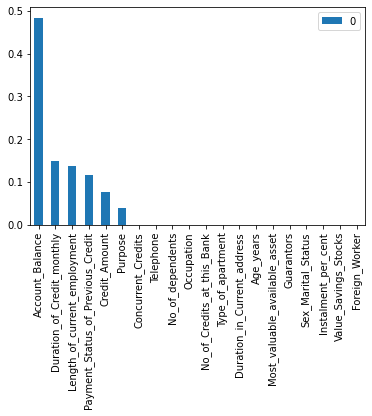

In [16]:
feature_importance.head(20).plot(kind = 'bar')

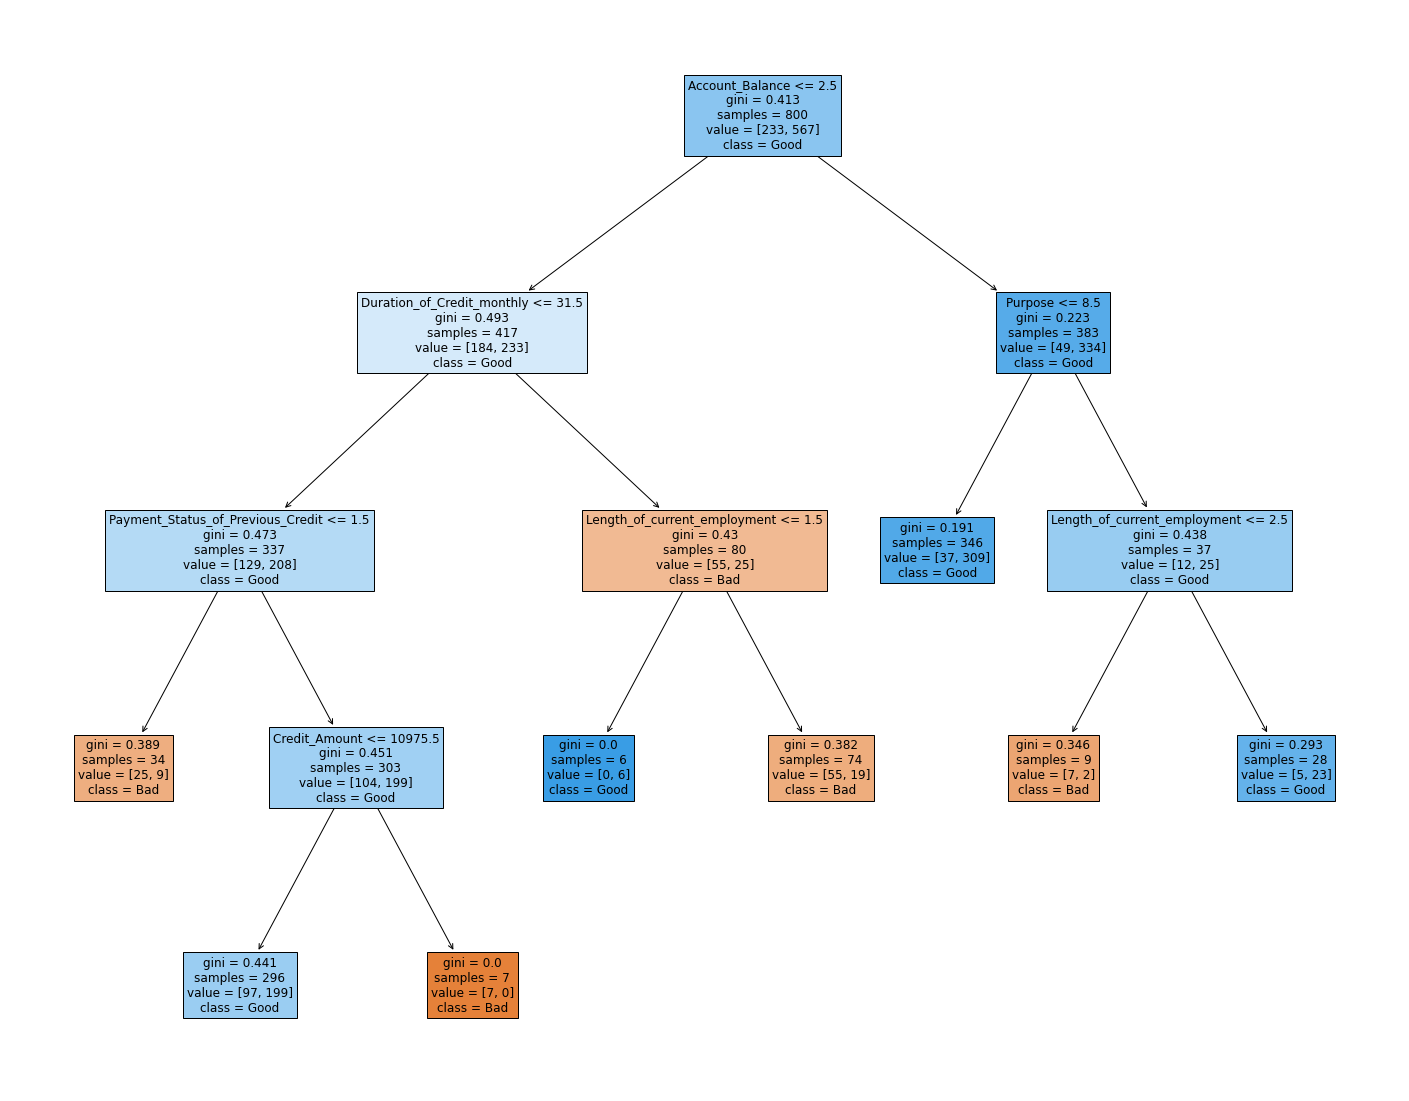

In [17]:
fig = plt.figure(figsize = (25, 20)) 
_ = tree.plot_tree(model, feature_names = feature_names, class_names = {0:'Bad', 1:'Good'}, filled = True, fontsize = 12)